#  Determining whether breast cancer tumors are malignant or benign based on size and shape

Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


The purpose of this notebook is to determine whether we can predict whether a breast cancer tumor is malignant or benign based on its size and shape. Logistic regression, KMeans, and PCA were performed on the dataset.

In [66]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn import cluster

import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv("breast_cancer.csv")

# Pre-processing

In [67]:
raw_data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [68]:
# create one hot of diagnosis
diagnosis_one_hot = pd.get_dummies(raw_data['diagnosis'])

# drop the diagnosis column, convert to one hot
df = raw_data.drop('diagnosis', axis=1)

# add one hot to dataframe
df = raw_data.join(diagnosis_one_hot)

In [69]:
#ml_df = df.sample(frac=1).reset_index(drop=True)
X = df.drop(['M', 'B','diagnosis', 'id'],axis=1)

# predict whether it's malignant or not
Y = df['M']

In [70]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# PCA

First, we do principal components analysis to reduce the dimensionality of the datasetm since there are 31 variables.

## Unscaled

We first do PCA without scaling the data, to see if it gives us better results than not scaling it.

([<matplotlib.axis.XTick at 0x1a237ffe90>,
 <a list of 20 Text xticklabel objects>)

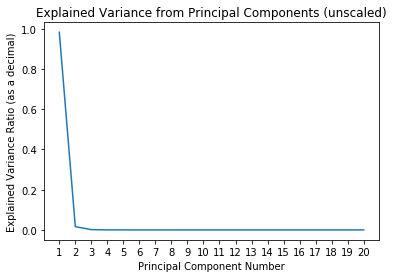

In [71]:
# split into training sets and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#perform PCA
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_PCA = pca.fit_transform(X_train)

# plot explained variance ratio and number of PC's (scree plot)
plt.figure()
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio (as a decimal)")
plt.title("Explained Variance from Principal Components (unscaled)")
plt.xticks(np.arange(pca.n_components_), range(1, pca.n_components_ + 1))

In [100]:
np.sum(pca.explained_variance_ratio_[0:1])

0.9820446715106615

We can see that the first two PC's have a combined explained variance ratio of aroind 98%, so we choose these two only.

Text(0.5, 1.0, 'Unscaled Principal Component Analysis')

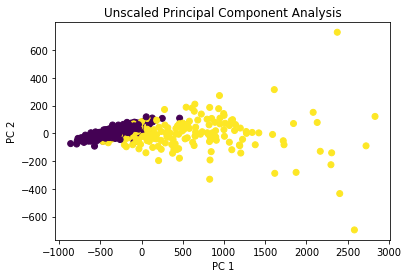

In [73]:
plt.figure()
scatter = plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=Y_train.values)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Unscaled Principal Component Analysis")

# Malignant is yellow, Benign is red

## Scaled

We scale the data to see if the PC's differ from the unscaled data.

([<matplotlib.axis.XTick at 0x1a23d71cd0>,
 <a list of 20 Text xticklabel objects>)

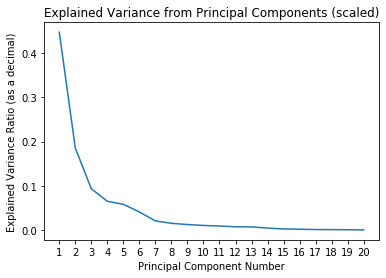

In [74]:
# scale the data
scaler = StandardScaler();
X_train_scale = scaler.fit_transform(X_train);

#perform PCA
pca = PCA(n_components=20)
pca.fit(X_train_scale)
X_train_scale_PCA = pca.fit_transform(X_train_scale)

# plot explained variance ratio and number of PC's (scree plot)
plt.figure()
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio (as a decimal)")
plt.title("Explained Variance from Principal Components (scaled)")
plt.xticks(np.arange(pca.n_components_), range(1, pca.n_components_ + 1))

In [75]:
np.sum(pca.explained_variance_ratio_[0:10])

0.9526562193183666

We're going to keep 10 PC's because this has a combined explained variance ratio of around 95%. It seems like the variance is spread out between the PC's more here than with the unscaled data.

# KMeans

## Unscaled

In [105]:
kmeans = KMeans(n_clusters=2).fit(X_train_PCA[:,0:1])
y_kmeans = kmeans.predict(X_train_PCA[:, 0:1])

Text(0.5, 1.0, "KMeans on Unscaled Set with 2 PC's")

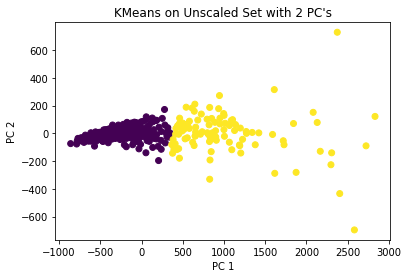

In [106]:
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c = y_kmeans)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("KMeans on Unscaled Set with 2 PC's")

In [107]:
# the true clusters that the points in the test set belong to
Y_test_kmeans = np.asarray(Y_test)

In [108]:
# get the accuracy
accuracy_score(Y_test_kmeans, kmeans_predict)

0.45614035087719296

It looks like KMeans is not clustering the way that we want it to. We want it to cluster how the "Unscaled Principal Component Analysis" graph has the points colored.

## Scaled

In [80]:
kmeans_scale = KMeans(n_clusters=2).fit(X_train_scale_PCA[:,0:10])

In [81]:
# scale and do PCA on the test set
X_test_scale = scaler.fit_transform(X_test)
X_test_scale_PCA = pca.fit_transform(X_test_scale)

In [82]:
# predict which clusters the test set will fit into
kmeans_predict_scale = kmeans_scale.predict(X_test_scale_PCA[:,0:10])

In [83]:
# the true clusters that the points in the test set belong to
Y_test_kmeans_scale = np.asarray(Y_test)

In [84]:
# get the accuracy
accuracy_score(Y_test_kmeans_scale, kmeans_predict_scale)

0.9473684210526315

It looks like KMeans clusters our data with pretty good accuracy if we do PCA, keep 10 PC's, and scale the data. Since we can't visualize a scatterplot in 10 dimensions, we use a crude method of accuracy to see whether KMeans is clustering the data in a way that we want it to.

# Multicollinearity

Since many of our variables are related to each other (i.e. we have the means, standard errors, etc. of different aspects of the tumor  shape and size), we want to throw out any variables that could be highly correlated. This will also help us reduce the number of features.

In [85]:
X_corr = pd.DataFrame(X)
correlation = X_corr.corr()

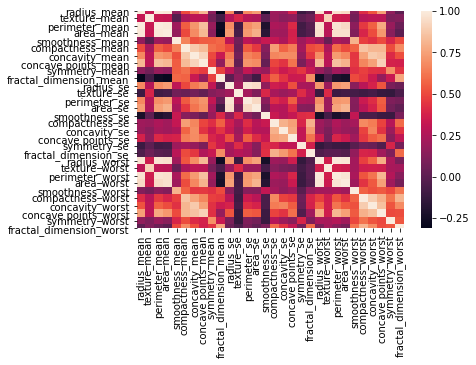

In [86]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

We remove any variables that have a correlation of 0.75 or above

In [87]:
# get upper triangle of matrix
upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

# get index of cols with a correlation of 0.75 or above
remove_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

In [88]:
X_corr.drop(X_corr[remove_cols], axis=1)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.2060
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.2572
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.2218
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.4087


# Logistic Regression

## Reduced number of variables

We do logistic regression on the data with only 12 variables, since the other variables are highly correlated.

In [89]:
# using only the variables that are not correlated
Y = df['M']

# split into training sets and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_corr,Y,test_size=0.2)

In [90]:
log = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

In [91]:
# get the training and test scores
log_train_score = log.score(X_train, Y_train)
log_test_score = log.score(X_test, Y_test)

In [92]:
log_train_score

0.9626373626373627

In [93]:
log_test_score

0.9473684210526315

We have a high accuracy after removing the variables with high correlations.

## With PCA and reduced variables

Now, we see if doing PCA on the reduced variables increases the accuracy of our model.

In [94]:
pca = PCA()
X_PCA_corr = pca.fit_transform(X_corr)

print(np.sum(pca.explained_variance_ratio_[0:1]))

0.9820446715106615


We keep only 2 PC's because they have 0.98 of the explained variance ratio.

In [95]:
# split into training sets and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_PCA_corr[:,0:1],Y,test_size=0.2)

In [96]:
log = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

# get the training and test scores
log_train_score = log.score(X_train, Y_train)
log_test_score = log.score(X_test, Y_test)

In [97]:
log_train_score

0.9120879120879121

In [98]:
log_test_score

0.8859649122807017

It seems like the accuracy goes down slightly if we do PCA on the reduced variables.

In conclusion, we had the highest accuracy when we did logistic regression after throwing out variables with high correlation, but it was slightly lower if PCA was applied after. KMeans did a good job of clustering the data, especially if we scaled the data, did principal components analysis, and then did KMeans.